In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
digits = pd.read_csv("/home/techfield/class/Presentations/USPS/usps_digit_recognizer.csv")

In [5]:
digits.shape

(42000, 785)

In [6]:
D = 785
K = 10

In [7]:
def shapes(x):
    x =  x.reshape([28,28])
    
    nzeros = x.nonzero()
    
    i,j = nzeros[0].min(), nzeros[0].max()
    m,n = nzeros[1].min(), nzeros[1].max()
    
    height = j-i
    width = n-m
    
    if height % 2 ==1:j+= 1
    if width % 2 ==1: n+=1
        
    return x[i:j,m:n]

def quadrent_1_sum(x):
    x = shapes(x)
    i,j = x.shape[0]//2,x.shape[1]//2
    q1 = x[0:i,0:j]
    return q1.sum

def top_half(x):
    x = shapes(x)
    i,l, = x.shape[0]//2,x.shape[1]//2
    q2 = x[0:i,j:2*j]
    return q2.sum

In [8]:
#digits= digits.drop("label",axis=1)

In [9]:
#N =digits.shape[0]

#E = np.column_stack((digits, np.array([quadrent_1_sum(digits[i,:]) for i in range(N)])))

In [10]:
#Training set
seed = 10
train1=digits.sample(frac=.6,random_state = seed)
training_target = train1.label.values
train= train1.drop("label",axis=1)
cols = train.columns
train['> zero'] = train[cols].gt(0).sum(axis=1)
trainmax= train.max(1)
train = train / trainmax[:,None]


#Validate set
validate_test = digits.loc[~digits.index.isin(train1.index)]

validate_origin = validate_test.sample(frac=.5,random_state = seed )
validate1 = validate_origin.drop("label",axis=1)
validate_target = validate_origin.label.values
validate = validate1
cols = validate.columns
validate['> zero'] = validate[cols].gt(0).sum(axis=1)
valmax= validate.max(1)
validate = validate / valmax[:,None]

#Test set
test = validate_test.loc[~validate_test.index.isin(validate_origin.index)]
test_no_y = test.drop("label",axis=1)
test_target = test.label.values
test = test_no_y
cols = test.columns
test['> zero'] = test[cols].gt(0).sum(axis=1)
testmax= test.max(1)
test = test / testmax[:,None]

In [11]:
validate.shape

(8400, 785)

In [12]:
test.shape

(8400, 785)

In [13]:
def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    
    Y = np.zeros((N,K))
    
    for i in range(N):
      #  try:
        Y[i,y[i]] = 1
       # except:
         #   pdb.set_trace()
        
    return Y

def softmax(H):
    eH = np.exp(H)
    return eH/eH.sum(axis = 1, keepdims = True)

def cross_entropy(Y,P_hat):
    return -np.sum(Y*np.log(P_hat))

def accuracy(y,P_hat):
    return np.mean(y == P_hat.argmax(axis =1))


    

In [14]:
PHI = np.column_stack((np.ones((25200,1)), train))
Y = one_hot_encode(training_target)

In [15]:
PHI.shape

(25200, 786)

In [16]:
Y.shape

(25200, 10)

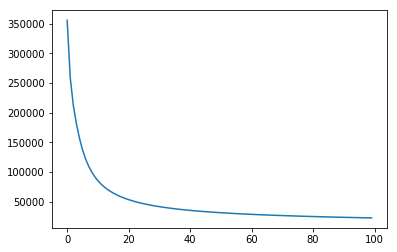

In [17]:
W = np.random.randn(D+1,K)

eta = 5e-5
epochs = int(5e2)
J = np.zeros(epochs)
for lambda1 in range(3):
    for lambda2 in range(3):
        for epoch in range(epochs):
            P_hat = softmax(PHI.dot(W))
            J[epoch] = cross_entropy(Y,P_hat)
            W -= eta*PHI.T.dot(P_hat - Y)
            if R2 > R2_old:
            R2_old = R2
            lambda2_real = lambda2
    
    plt.figure()
    plt.plot(J)

In [32]:
#Accuracy for test set
print("Accuracy: {:0.4f}".format(accuracy(training_target,P_hat)))

Accuracy: 0.9390


In [33]:
validate.shape

(8400, 785)

In [34]:
validate = np.column_stack((np.ones((8400,1)), validate))
#Y = one_hot_encode(validate_target)

In [35]:
p_hat = validate.dot(W)

In [36]:
print("Accuracy: {:0.4f}".format(accuracy(validate_target,p_hat)))

Accuracy: 0.9017


In [37]:
test.shape

(8400, 785)

In [38]:
test = np.column_stack((np.ones((8400,1)), test))

In [39]:
p_hat = test.dot(W)

In [40]:
print("Accuracy: {:0.4f}".format(accuracy(test_target,p_hat)))

Accuracy: 0.9099
